In [10]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [13]:
from langchain_openai import ChatOpenAI
# set by default env OPENAI_API_KEY
llm = ChatOpenAI(model="gpt-4o", temperature=0.5, max_tokens=2000)
llm.invoke("Hola quien eres tu?")

AIMessage(content='¡Hola! Soy un modelo de lenguaje desarrollado por OpenAI, conocido como ChatGPT. Estoy aquí para ayudarte a responder preguntas, proporcionar información y mantener conversaciones sobre una amplia variedad de temas. ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 12, 'total_tokens': 58, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_523b9b6e5f', 'finish_reason': 'stop', 'logprobs': None}, id='run-531c12e8-c44b-4cb6-9283-0df241f69eff-0', usage_metadata={'input_tokens': 12, 'output_tokens': 46, 'total_tokens': 58, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [15]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END, MessagesState

class State(MessagesState):
    my_var: str
    customer_name: str

In [16]:
from langchain_core.messages import SystemMessage

system_message = SystemMessage(content="You are a friendly assistant")


def node_llm(state: State) -> State:
    print(state)
    message = llm.invoke(system_message + state["messages"])
    return {"messages": message}


In [18]:
builder = StateGraph(State)

builder.add_node('node_llm', node_llm)

builder.add_edge(START, 'node_llm')
builder.add_edge('node_llm', END)

graph = builder.compile()

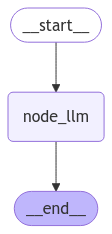

In [19]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))